In [1]:
import nltk
import random
from nltk.classify.scikitlearn import SklearnClassifier
import pickle
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from nltk.classify import ClassifierI
from statistics import mode
from nltk.tokenize import word_tokenize
import re
import os

In [2]:
from nltk.corpus.reader import WordListCorpusReader
from nltk.corpus.reader.api import *
nltk.download('opinion_lexicon')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import opinion_lexicon

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /Users/tyler/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/tyler/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/tyler/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/tyler/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [431]:
# # files_pos = os.listdir('train/pos')
# # files_pos = [open('train/pos/'+f, 'r').read() for f in files_pos]
# # files_neg = os.listdir('train/neg')
# # files_neg = [open('train/neg/'+f, 'r').read() for f in files_neg]

# from nltk.corpus import stopwords
# import re

# def clean_pos_neg():
    
#     files_pos = opinion_lexicon.positive()
#     files_neg = opinion_lexicon.negative()

#     all_words = []
#     pos_words = []
#     neg_words = []
#     documents = []



#     stop_words = list(set(stopwords.words('english')))

#     #  j is adject, r is adverb, and v is verb
#     #allowed_word_types = ["J","R","V"]
#     allowed_word_types = ["J","R","V"]

#     for p in  files_pos:
    
#         # create a list of tuples where the first element of each tuple is a review
#         # the second element is the label
#         documents.append( (p, "pos") )

#         # remove punctuations
#         cleaned = re.sub(r'[^(a-zA-Z)\s]','', p)

#         # tokenize 
#         tokenized = word_tokenize(cleaned)

#         # remove stopwords 
#         stopped = [w for w in tokenized if not w in stop_words]

#         # parts of speech tagging for each word 
#         pos = nltk.pos_tag(stopped)

#         # make a list of  all adjectives identified by the allowed word types list above
#         for w in pos:
#             if w[1][0] in allowed_word_types:
#                 pos_words.append(w[0].lower())

#     for p in files_neg:
#         # create a list of tuples where the first element of each tuple is a review
#         # the second element is the label
#         documents.append( (p, "neg") )

#         # remove punctuations
#         cleaned = re.sub(r'[^(a-zA-Z)\s]','', p)

#         # tokenize 
#         tokenized = word_tokenize(cleaned)

#         # remove stopwords 
#         stopped = [w for w in tokenized if not w in stop_words]

#         # parts of speech tagging for each word 
#         neg = nltk.pos_tag(stopped)

#         # make a list of  all adjectives identified by the allowed word types list above
#         for w in neg:
#             if w[1][0] in allowed_word_types:
#                 neg_words.append(w[0].lower())

#     return pos_words, neg_words

895


In [487]:
pos_lex = opinion_lexicon.positive()
neg_lex = opinion_lexicon.negative()


In [440]:
opinion_lexicon?

## load in pre-processed confessions

In [3]:
import pandas as pd
path = '/Users/tyler/UCSD_Wellness/analysis/data/data1.csv'
confessions=pd.read_csv(path)

In [4]:
confessions.head()

,id,timestamp,content,contact,tags,note
0,14442,2019-10-12 17:05:24,I’m super excited for homecoming next weekend ...,NaN,NaN,NaN
1,14441,2019-10-12 13:22:03,"If I never met you, I would never have gotten ...",NaN,serious,NaN
2,14440,2019-10-11 17:03:50,There is an abnormal amount of hot girls that ...,NaN,NaN,NaN
3,14439,2019-10-11 15:58:00,"Just out of curiosity, on a scale of one to te...",NaN,NaN,NaN
4,14438,2019-10-10 19:10:20,To the person who was playing the trumpet outs...,NaN,wholesome,NaN


In [5]:
content = confessions['content'].tolist()

In [ ]:
#read in VAD lexicon
vad_lex = pd.read_csv("./data/NRC-VAD-Lexicon.txt", sep=" ", header=None)
data.columns = ["a", "b", "c", "etc."]

In [ ]:
import sys

with open("./data/NRC-VAD-Lexicon.txt","r") as f:
#     total = sys.getsizeof(f)
#     print(total)
    for line in f.readlines():
        print(line)
f.close()     

In [6]:
# convert txt to csv
import csv

txt_file = r"./data/NRC-VAD-Lexicon.txt"
csv_file = r"vad_lex.csv"

# use 'with' if the program isn't going to immediately terminate
# so you don't leave files open
# the 'b' is necessary on Windows
# it prevents \x1a, Ctrl-z, from ending the stream prematurely
# and also stops Python converting to / from different line terminators
# On other platforms, it has no effect
in_txt = csv.reader(open(txt_file, "r"), delimiter = '\t')
out_csv = csv.writer(open(csv_file, 'w'))

out_csv.writerows(in_txt)

In [7]:
vad_lex = pd.read_csv('vad_lex.csv')

In [8]:
vad_lex.head()

,Word,Valence,Arousal,Dominance
0,aaaaaaah,0.479,0.606,0.291
1,aaaah,0.520,0.636,0.282
2,aardvark,0.427,0.490,0.437
3,aback,0.385,0.407,0.288
4,abacus,0.510,0.276,0.485


In [ ]:
for i in range(len(vad_lex['Word'])):
    print(vad_lex['Word'][i])

In [ ]:
!pip install wordcloud

In [9]:
%matplotlib inline

import nltk.data;
from gensim.models import word2vec;
from sklearn.cluster import KMeans;
from sklearn.neighbors import KDTree;
import pandas as pd;
import numpy as np;
import os;
import re;
import logging;
import sqlite3;
import time;
import sys;
import multiprocessing;
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt;
from itertools import cycle;

In [10]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle');


In [449]:
def clean_text(all_comments, out_name):
    
    stop_words = list(set(stopwords.words('english')))
    
    out_file = open(out_name, 'w');
    
    for pos in range(len(all_comments)):
        
        #Get the comment
        val = all_comments.iloc[pos];
        
        #Normalize tabs and remove newlines
        no_tabs = str(val).replace('\t', ' ').replace('\n', '');
        
        #Remove all characters except A-Z and a dot.
        alphas_only = re.sub("[^a-zA-Z\.]", " ", no_tabs);
        
        #Remove punctuation
        no_punc = re.sub(r'[^(a-zA-Z)\s]','', alphas_only)
        
        #Normalize spaces to 1
        multi_spaces = re.sub(" +", " ", no_punc);
        
        #Strip trailing and leading spaces
        no_spaces = multi_spaces.strip();
        
        #Normalize all charachters to lowercase
        clean_text = no_spaces.lower();
        
        #Get sentences from the tokenizer, remove the dot in each.
        sentences = tokenizer.tokenize(clean_text);
        
        stopped = [w for w in sentences if not w in stop_words]
        
        sentences = [re.sub("[\.]", "", sentence) for sentence in sentences];
        
        #If the text has more than one space (removing single word comments) and one character, write it to the file.
        out_file.write("%s\n" % sentences)
                
                
        #Simple logging. At every 50000th step,
        #print the total number of rows processed and time taken so far, and flush the file.
#         if pos % 50000 == 0:
#             total_time = time.time() - start;
# #             sys.stdout.write('Completed ' + str(round(100 * (pos / total_rows), 2)) + '% - ' + str(pos) + ' rows in time ' + str(round(total_time / 60, 0)) + ' min & ' + str(round(total_time % 60, 2)) + ' secs\r');
#             out_file.flush();
#             break;
        
    out_file.close();

In [450]:
confessions['timestamp']=pd.to_datetime(confessions.timestamp)
confessions['weekday']=confessions.timestamp.dt.strftime('%a')
confessions['weekday']=pd.Categorical(confessions['weekday'],categories=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],ordered=True)

confessions.head()

,id,timestamp,content,contact,tags,note,weekday
0,14442,2019-10-12 17:05:24,I’m super excited for homecoming next weekend ...,NaN,NaN,NaN,Sat
1,14441,2019-10-12 13:22:03,"If I never met you, I would never have gotten ...",NaN,serious,NaN,Sat
2,14440,2019-10-11 17:03:50,There is an abnormal amount of hot girls that ...,NaN,NaN,NaN,Fri
3,14439,2019-10-11 15:58:00,"Just out of curiosity, on a scale of one to te...",NaN,NaN,NaN,Fri
4,14438,2019-10-10 19:10:20,To the person who was playing the trumpet outs...,NaN,wholesome,NaN,Thu


In [451]:
start = time.time();
clean_comments = clean_text(confessions['content'], './data/extra_clean_comments.txt')
print('Total time: ' + str((time.time() - start)) + ' secs')

Total time: 0.9246559143066406 secs


In [452]:
# convert txt to csv
import csv

txt_file = r"./data/extra_clean_comments.txt"
csv_file = r"extra_clean_comments.csv"

# use 'with' if the program isn't going to immediately terminate
# so you don't leave files open
# the 'b' is necessary on Windows
# it prevents \x1a, Ctrl-z, from ending the stream prematurely
# and also stops Python converting to / from different line terminators
# On other platforms, it has no effect
in_txt = csv.reader(open(txt_file, "r"), delimiter = '\t')
out_csv = csv.writer(open(csv_file, 'w'))

out_csv.writerows(in_txt)

In [453]:
clean_comments = pd.read_csv('extra_clean_comments.csv', header=None)

In [454]:

clean_content = clean_comments[0].tolist()
len(clean_content)

8214

895

In [489]:
from tqdm import tqdm
import numpy as np
from collections import defaultdict
pn_lex_score = defaultdict(int)
clean_content = clean_comments[0].tolist()
for i,note in tqdm(enumerate(clean_content)):
    pn_lex_score[i] = np.array([0.,0.])
    note = re.sub("[^\w]", " ",  note).split()
    for word in note:
        if word in pos_lex:
            pn_lex_score[i] += np.array([1.,0.])
        elif word in neg_lex:
            pn_lex_score[i] += np.array([0.,1.])

8214it [2:55:03,  1.64s/it] 


In [495]:
output = open('pn_lex_score.pkl', 'wb')
pickle.dump(pn_lex_score, output)
output.close()

In [494]:
w = csv.writer(open("pn_lex_score.csv", "w"))
for key, val in pn_lex_score.items():
    print(val)
    w.writerow([key, val])

[6. 1.]
[4. 6.]
[3. 1.]
[0. 0.]
[3. 0.]
[1. 0.]
[0. 2.]
[0. 2.]
[3. 4.]
[3. 1.]
[ 3. 13.]
[1. 0.]
[1. 2.]
[0. 2.]
[0. 1.]
[0. 0.]
[1. 0.]
[4. 0.]
[8. 4.]
[4. 1.]
[0. 2.]
[1. 0.]
[0. 2.]
[1. 2.]
[1. 4.]
[8. 9.]
[1. 0.]
[8. 7.]
[0. 0.]
[4. 2.]
[1. 0.]
[0. 1.]
[4. 3.]
[1. 1.]
[3. 4.]
[4. 3.]
[0. 0.]
[2. 1.]
[4. 6.]
[1. 0.]
[1. 0.]
[1. 0.]
[ 9. 11.]
[3. 6.]
[0. 2.]
[5. 1.]
[0. 1.]
[11. 11.]
[1. 0.]
[1. 1.]
[0. 1.]
[3. 6.]
[1. 0.]
[3. 3.]
[0. 0.]
[1. 0.]
[1. 2.]
[1. 0.]
[1. 2.]
[0. 0.]
[6. 0.]
[0. 1.]
[0. 3.]
[0. 0.]
[2. 3.]
[2. 0.]
[0. 1.]
[7. 3.]
[2. 6.]
[0. 2.]
[2. 0.]
[3. 3.]
[0. 2.]
[4. 6.]
[0. 2.]
[2. 3.]
[2. 1.]
[0. 2.]
[2. 3.]
[2. 1.]
[2. 1.]
[5. 2.]
[1. 1.]
[1. 1.]
[30. 24.]
[0. 0.]
[7. 8.]
[1. 3.]
[2. 0.]
[3. 3.]
[7. 2.]
[9. 5.]
[2. 6.]
[4. 1.]
[0. 0.]
[0. 0.]
[1. 0.]
[2. 5.]
[1. 4.]
[4. 3.]
[0. 4.]
[0. 2.]
[3. 0.]
[3. 4.]
[0. 0.]
[2. 1.]
[1. 2.]
[0. 1.]
[0. 0.]
[1. 0.]
[2. 1.]
[1. 1.]
[2. 1.]
[3. 3.]
[0. 2.]
[0. 0.]
[2. 0.]
[6. 3.]
[0. 2.]
[2. 0.]
[2. 9.]
[0. 2.]
[1. 1.]
[0. 3.]


[0. 0.]
[14. 14.]
[1. 4.]
[1. 0.]
[0. 0.]
[0. 0.]
[0. 0.]
[1. 1.]
[0. 1.]
[1. 2.]
[0. 2.]
[0. 1.]
[1. 5.]
[ 7. 32.]
[0. 1.]
[1. 7.]
[11.  4.]
[15.  8.]
[4. 4.]
[3. 5.]
[40. 21.]
[2. 2.]
[2. 1.]
[0. 4.]
[0. 1.]
[1. 1.]
[0. 0.]
[2. 5.]
[ 5. 15.]
[1. 4.]
[0. 1.]
[3. 3.]
[1. 0.]
[0. 2.]
[4. 2.]
[6. 4.]
[5. 1.]
[6. 2.]
[0. 1.]
[4. 2.]
[1. 0.]
[0. 3.]
[0. 0.]
[0. 1.]
[1. 0.]
[1. 1.]
[0. 0.]
[0. 1.]
[0. 2.]
[1. 5.]
[1. 2.]
[1. 6.]
[2. 2.]
[0. 1.]
[0. 4.]
[0. 0.]
[4. 6.]
[1. 1.]
[1. 9.]
[3. 0.]
[2. 0.]
[1. 0.]
[7. 3.]
[1. 3.]
[2. 0.]
[3. 9.]
[9. 8.]
[4. 8.]
[1. 1.]
[ 4. 15.]
[1. 0.]
[5. 0.]
[2. 0.]
[7. 8.]
[0. 1.]
[1. 0.]
[0. 1.]
[5. 1.]
[0. 1.]
[0. 1.]
[3. 1.]
[4. 1.]
[0. 3.]
[2. 2.]
[4. 4.]
[2. 0.]
[2. 2.]
[0. 0.]
[1. 4.]
[1. 0.]
[2. 0.]
[9. 6.]
[1. 0.]
[0. 1.]
[0. 1.]
[2. 3.]
[3. 7.]
[0. 0.]
[0. 0.]
[0. 2.]
[0. 2.]
[6. 5.]
[3. 2.]
[0. 0.]
[2. 8.]
[6. 4.]
[4. 1.]
[3. 7.]
[0. 0.]
[2. 2.]
[1. 0.]
[0. 2.]
[2. 2.]
[1. 1.]
[2. 3.]
[ 9. 10.]
[13. 13.]
[0. 1.]
[0. 2.]
[1. 2.]
[1. 0.]
[0. 3.]
[0. 0.

[0. 0.]
[1. 2.]
[2. 4.]
[2. 1.]
[1. 0.]
[ 7. 16.]
[0. 0.]
[21. 46.]
[0. 0.]
[4. 0.]
[2. 2.]
[0. 0.]
[1. 3.]
[0. 0.]
[0. 3.]
[0. 2.]
[2. 3.]
[2. 3.]
[0. 0.]
[5. 3.]
[0. 1.]
[1. 4.]
[0. 1.]
[0. 1.]
[0. 1.]
[5. 3.]
[2. 3.]
[2. 0.]
[0. 0.]
[1. 1.]
[1. 2.]
[0. 1.]
[1. 0.]
[2. 1.]
[0. 1.]
[0. 0.]
[0. 0.]
[0. 2.]
[1. 0.]
[2. 2.]
[6. 2.]
[1. 2.]
[1. 1.]
[4. 9.]
[1. 4.]
[8. 5.]
[1. 1.]
[0. 0.]
[0. 1.]
[2. 0.]
[0. 1.]
[1. 1.]
[1. 1.]
[17. 17.]
[5. 2.]
[0. 0.]
[3. 0.]
[1. 0.]
[0. 0.]
[0. 2.]
[1. 0.]
[1. 1.]
[2. 2.]
[1. 1.]
[2. 1.]
[5. 2.]
[3. 1.]
[6. 2.]
[1. 2.]
[1. 0.]
[0. 3.]
[0. 1.]
[1. 2.]
[5. 3.]
[1. 0.]
[3. 3.]
[4. 2.]
[0. 4.]
[0. 1.]
[0. 1.]
[5. 7.]
[21. 27.]
[1. 2.]
[2. 1.]
[1. 0.]
[0. 1.]
[5. 2.]
[0. 2.]
[4. 5.]
[0. 0.]
[0. 1.]
[1. 3.]
[0. 1.]
[1. 0.]
[3. 0.]
[2. 0.]
[1. 0.]
[2. 4.]
[1. 0.]
[1. 1.]
[0. 1.]
[0. 3.]
[2. 1.]
[5. 4.]
[0. 0.]
[1. 4.]
[1. 0.]
[5. 2.]
[0. 0.]
[5. 0.]
[6. 5.]
[7. 9.]
[0. 2.]
[0. 3.]
[0. 1.]
[0. 2.]
[11. 33.]
[2. 1.]
[0. 0.]
[0. 0.]
[4. 4.]
[2. 3.]
[0. 0.]
[3. 0.

[2. 0.]
[3. 0.]
[0. 4.]
[0. 4.]
[1. 1.]
[0. 0.]
[2. 2.]
[6. 1.]
[2. 1.]
[4. 7.]
[3. 3.]
[2. 0.]
[0. 2.]
[0. 3.]
[0. 3.]
[7. 0.]
[1. 2.]
[6. 2.]
[4. 2.]
[1. 0.]
[0. 1.]
[1. 1.]
[1. 5.]
[1. 1.]
[1. 0.]
[2. 7.]
[0. 4.]
[0. 0.]
[2. 1.]
[1. 0.]
[3. 4.]
[1. 0.]
[1. 0.]
[2. 1.]
[1. 2.]
[3. 0.]
[0. 4.]
[1. 1.]
[2. 4.]
[0. 0.]
[0. 0.]
[0. 0.]
[14.  6.]
[2. 1.]
[11. 18.]
[2. 1.]
[6. 2.]
[0. 0.]
[0. 5.]
[2. 2.]
[2. 0.]
[1. 1.]
[16.  8.]
[6. 0.]
[2. 0.]
[0. 2.]
[2. 2.]
[1. 3.]
[2. 2.]
[1. 0.]
[2. 2.]
[1. 2.]
[2. 0.]
[0. 2.]
[2. 5.]
[0. 1.]
[0. 0.]
[1. 0.]
[1. 0.]
[0. 0.]
[6. 2.]
[0. 0.]
[2. 0.]
[5. 6.]
[0. 0.]
[0. 1.]
[0. 1.]
[3. 0.]
[2. 8.]
[0. 1.]
[1. 1.]
[0. 1.]
[0. 0.]
[1. 1.]
[0. 0.]
[2. 3.]
[0. 0.]
[1. 0.]
[1. 1.]
[2. 3.]
[1. 1.]
[12.  4.]
[4. 2.]
[0. 1.]
[2. 2.]
[1. 0.]
[1. 3.]
[0. 1.]
[0. 0.]
[3. 7.]
[0. 0.]
[0. 1.]
[0. 3.]
[0. 6.]
[12. 12.]
[3. 3.]
[4. 2.]
[0. 1.]
[0. 0.]
[3. 0.]
[1. 0.]
[12.  5.]
[3. 0.]
[2. 3.]
[0. 2.]
[1. 2.]
[1. 2.]
[4. 4.]
[2. 3.]
[11. 15.]
[4. 6.]
[0. 1.]
[3. 3.]
[6

[0. 2.]
[0. 2.]
[3. 0.]
[1. 0.]
[0. 0.]
[1. 3.]
[8. 5.]
[1. 1.]
[0. 2.]
[10. 21.]
[ 6. 18.]
[1. 2.]
[5. 4.]
[1. 1.]
[4. 7.]
[4. 0.]
[4. 0.]
[6. 7.]
[2. 7.]
[0. 0.]
[14. 12.]
[6. 2.]
[0. 1.]
[3. 2.]
[2. 1.]
[4. 6.]
[2. 1.]
[5. 5.]
[8. 6.]
[3. 0.]
[2. 0.]
[8. 6.]
[2. 1.]
[0. 0.]
[2. 1.]
[0. 2.]
[0. 3.]
[1. 0.]
[2. 5.]
[0. 0.]
[2. 2.]
[0. 0.]
[6. 8.]
[2. 0.]
[3. 2.]
[0. 0.]
[3. 2.]
[3. 1.]
[0. 1.]
[2. 0.]
[3. 4.]
[0. 4.]
[6. 6.]
[2. 0.]
[1. 2.]
[ 2. 12.]
[6. 4.]
[0. 4.]
[1. 2.]
[2. 6.]
[12.  2.]
[0. 1.]
[2. 2.]
[2. 0.]
[0. 0.]
[3. 0.]
[2. 2.]
[0. 1.]
[6. 3.]
[4. 6.]
[1. 0.]
[1. 9.]
[1. 1.]
[0. 1.]
[0. 1.]
[1. 3.]
[0. 2.]
[3. 2.]
[0. 0.]
[3. 4.]
[0. 1.]
[1. 8.]
[2. 1.]
[1. 0.]
[0. 2.]
[1. 1.]
[5. 0.]
[0. 3.]
[1. 2.]
[0. 0.]
[0. 0.]
[0. 2.]
[3. 1.]
[7. 7.]
[2. 2.]
[7. 5.]
[3. 4.]
[4. 4.]
[6. 3.]
[10.  7.]
[1. 3.]
[2. 8.]
[8. 3.]
[0. 3.]
[0. 2.]
[5. 1.]
[3. 1.]
[0. 0.]
[3. 1.]
[1. 1.]
[0. 2.]
[2. 4.]
[ 5. 13.]
[0. 0.]
[3. 2.]
[2. 1.]
[4. 6.]
[1. 1.]
[1. 1.]
[1. 4.]
[3. 0.]
[2. 1.]
[ 8. 11.]


[1. 0.]
[0. 0.]
[0. 1.]
[1. 0.]
[6. 2.]
[2. 4.]
[1. 0.]
[10.  7.]
[2. 1.]
[1. 5.]
[11. 15.]
[8. 6.]
[ 7. 14.]
[1. 0.]
[0. 0.]
[0. 1.]
[6. 5.]
[1. 0.]
[8. 4.]
[1. 0.]
[0. 5.]
[2. 0.]
[0. 2.]
[0. 0.]
[6. 1.]
[6. 2.]
[2. 0.]
[0. 1.]
[0. 2.]
[0. 3.]
[3. 3.]
[2. 2.]
[5. 0.]
[0. 0.]
[1. 0.]
[8. 7.]
[1. 3.]
[1. 0.]
[1. 3.]
[5. 1.]
[2. 1.]
[2. 4.]
[3. 2.]
[0. 4.]
[4. 6.]
[3. 2.]
[1. 2.]
[0. 5.]
[6. 1.]
[1. 5.]
[0. 0.]
[0. 0.]
[6. 4.]
[0. 0.]
[6. 1.]
[1. 2.]
[5. 2.]
[1. 0.]
[1. 0.]
[4. 1.]
[0. 1.]
[0. 0.]
[2. 0.]
[1. 1.]
[0. 1.]
[3. 7.]
[2. 0.]
[1. 1.]
[0. 2.]
[6. 4.]
[8. 5.]
[3. 7.]
[3. 5.]
[0. 0.]
[1. 3.]
[3. 1.]
[2. 0.]
[1. 1.]
[3. 2.]
[0. 3.]
[2. 5.]
[6. 5.]
[0. 1.]
[0. 0.]
[2. 2.]
[0. 1.]
[5. 2.]
[0. 1.]
[0. 0.]
[3. 6.]
[3. 6.]
[3. 1.]
[0. 1.]
[2. 1.]
[0. 0.]
[0. 2.]
[19.  8.]
[1. 0.]
[10. 13.]
[3. 3.]
[4. 2.]
[0. 1.]
[0. 0.]
[7. 6.]
[4. 2.]
[3. 7.]
[2. 2.]
[0. 0.]
[3. 2.]
[2. 2.]
[13. 16.]
[1. 0.]
[1. 0.]
[6. 3.]
[1. 0.]
[2. 0.]
[1. 1.]
[0. 1.]
[2. 0.]
[0. 0.]
[0. 0.]
[3. 2.]
[3. 3.]
[2. 

[1. 0.]
[1. 0.]
[1. 3.]
[0. 2.]
[1. 0.]
[1. 4.]
[1. 0.]
[5. 2.]
[6. 4.]
[2. 2.]
[0. 0.]
[19. 23.]
[4. 6.]
[2. 2.]
[4. 1.]
[1. 2.]
[0. 0.]
[9. 1.]
[3. 2.]
[1. 1.]
[1. 2.]
[1. 1.]
[1. 3.]
[0. 0.]
[1. 0.]
[1. 0.]
[1. 0.]
[3. 6.]
[0. 0.]
[10.  2.]
[1. 5.]
[2. 0.]
[0. 2.]
[5. 5.]
[0. 1.]
[14.  3.]
[0. 1.]
[0. 1.]
[1. 0.]
[6. 0.]
[1. 0.]
[7. 5.]
[8. 2.]
[1. 0.]
[5. 3.]
[16. 12.]
[ 6. 11.]
[1. 2.]
[3. 7.]
[4. 2.]
[1. 1.]
[1. 0.]
[0. 2.]
[2. 2.]
[3. 4.]
[0. 0.]
[0. 2.]
[0. 0.]
[1. 1.]
[0. 6.]
[4. 5.]
[1. 3.]
[0. 3.]
[2. 0.]
[0. 0.]
[1. 2.]
[0. 1.]
[1. 2.]
[0. 0.]
[1. 0.]
[0. 1.]
[0. 2.]
[0. 0.]
[1. 7.]
[1. 6.]
[4. 2.]
[0. 2.]
[2. 1.]
[0. 2.]
[1. 1.]
[3. 3.]
[0. 0.]
[3. 4.]
[6. 1.]
[2. 3.]
[20. 19.]
[4. 6.]
[10.  4.]
[9. 7.]
[1. 0.]
[1. 0.]
[2. 0.]
[6. 2.]
[1. 0.]
[3. 3.]
[1. 1.]
[7. 0.]
[2. 1.]
[1. 0.]
[0. 1.]
[1. 2.]
[13. 11.]
[ 4. 12.]
[1. 0.]
[5. 3.]
[0. 1.]
[1. 1.]
[0. 3.]
[5. 1.]
[6. 2.]
[1. 1.]
[10.  7.]
[1. 3.]
[0. 1.]
[11.  5.]
[0. 0.]
[2. 2.]
[2. 0.]
[0. 3.]
[1. 0.]
[2. 3.]
[1. 2.]
[3

In [455]:
from tqdm import tqdm
import numpy as np
from collections import defaultdict
all_VAD_scores = defaultdict(int)
clean_content = clean_comments[0].tolist()
for i,note in tqdm(enumerate(clean_content)):
    all_VAD_scores[i] = np.array([0.,0.,0.])
    note = re.sub("[^\w]", " ",  note).split()
    for word in note:
        if word in list(vad_lex['Word']):
            all_VAD_scores[i] += np.array([vad_lex['Valence'][i],vad_lex['Arousal'][i],vad_lex['Dominance'][i]])

8214it [04:08, 43.96it/s]


In [456]:
all_VAD_scores

defaultdict(int,
            {0: array([12.933, 16.362,  7.857]),
             1: array([28.6 , 34.98, 15.51]),
             2: array([4.27, 4.9 , 4.37]),
             3: array([3.08 , 3.256, 2.304]),
             4: array([5.61 , 3.036, 5.335]),
             5: array([8.   , 7.68 , 6.592]),
             6: array([0.52, 5.19, 2.45]),
             7: array([0.506, 5.291, 1.43 ]),
             8: array([ 3.712, 12.47 ,  5.858]),
             9: array([ 8.142, 29.624, 14.122]),
             10: array([15.555, 42.456, 36.844]),
             11: array([1.94, 1.69, 1.68]),
             12: array([12.926, 11.5  , 11.04 ]),
             13: array([5.22 , 3.303, 3.996]),
             14: array([1.708, 1.284, 1.932]),
             15: array([2.124, 1.5  , 1.32 ]),
             16: array([0.469, 0.306, 0.345]),
             17: array([7.973, 7.854, 8.007]),
             18: array([31.85 , 29.64 , 28.925]),
             19: array([ 3.114, 12.96 , 11.07 ]),
             20: array([ 1.116, 17.82 , 1

In [457]:
test = confessions

In [458]:
test = pd.DataFrame.from_dict(all_VAD_scores, orient='index', columns=['Valence','Arousal','Dominance'])

In [459]:
new = pd.concat([confessions,test],axis=1)

In [460]:
new.head()

,id,timestamp,content,contact,tags,note,weekday,Valence,Arousal,Dominance
0,14442,2019-10-12 17:05:24,I’m super excited for homecoming next weekend ...,NaN,NaN,NaN,Sat,12.933,16.362,7.857
1,14441,2019-10-12 13:22:03,"If I never met you, I would never have gotten ...",NaN,serious,NaN,Sat,28.600,34.980,15.510
2,14440,2019-10-11 17:03:50,There is an abnormal amount of hot girls that ...,NaN,NaN,NaN,Fri,4.270,4.900,4.370
3,14439,2019-10-11 15:58:00,"Just out of curiosity, on a scale of one to te...",NaN,NaN,NaN,Fri,3.080,3.256,2.304
4,14438,2019-10-10 19:10:20,To the person who was playing the trumpet outs...,NaN,wholesome,NaN,Thu,5.610,3.036,5.335


In [461]:
weekday_valence_sum=new.groupby('weekday')['Valence'].sum()
weekday_valence_count=new.groupby('weekday')['Valence'].count()
valence = weekday_valence_sum/weekday_valence_count

weekday_arousal_sum=new.groupby('weekday')['Arousal'].sum()
weekday_arousal_count=new.groupby('weekday')['Arousal'].count()
arousal = weekday_arousal_sum/weekday_arousal_count

weekday_dominance_sum=new.groupby('weekday')['Dominance'].sum()
weekday_dominance_count=new.groupby('weekday')['Dominance'].count()
dominance = weekday_dominance_sum/weekday_dominance_count



In [462]:
dominance - 10


weekday
Mon    0.697653
Tue    0.814344
Wed    0.517860
Thu    1.014081
Fri    0.962155
Sat    1.454931
Sun    1.386300
Name: Dominance, dtype: float64

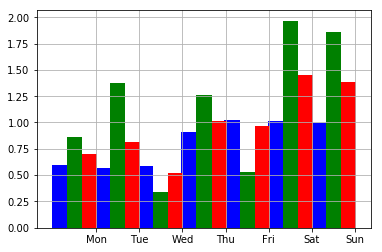

In [484]:
fig, ax = plt.subplots()
index = np.arange(7)
bar_width =0.5
w = 0.35
ax.bar(index-w, valence.values-10, width=w, color='b', align='center')
ax.bar(index, arousal.values-10, width=w, color='g', align='center')
ax.bar(index+w, dominance.values-10, width=w, color='r', align='center')
# ax.bar(list(weekday_distri.index))
# plt.bar(index, weekday_valence.values)
# plt.bar(index+bar_width, weekday_arousal.values)
# plt.bar(index+bar_width*2, weekday_dominance.values)
# ax.set(xlabel='weekday', ylabel='VAD score')
ax.grid()
plt.xticks(index+bar_width,list(weekday_valence.index))
fig.savefig("weekday.png")
plt.show()

In [464]:
from gensim.models.word2vec import LineSentence

In [465]:
start = time.time();
#Set the logging format to get some basic updates.
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
    level=logging.INFO)
# Set values for various parameters
num_features = 100;    # Dimensionality of the hidden layer representation
min_word_count = 40;   # Minimum word count to keep a word in the vocabulary
num_workers = multiprocessing.cpu_count();       # Number of threads to run in parallel set to total number of cpus.
context = 5          # Context window size (on each side)                                                       
downsampling = 1e-3   # Downsample setting for frequent words
# Initialize and train the model. 
#The LineSentence object allows us to pass in a file name directly as input to Word2Vec,
#instead of having to read it into memory first.
print("Training model...");
model = word2vec.Word2Vec(LineSentence('clean_comments.csv'), workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling);
# We don't plan on training the model any further, so calling 
# init_sims will make the model more memory efficient by normalizing the vectors in-place.
model.init_sims(replace=True);
# Save the model
model_name = "model_full_confessions";
model.save(model_name);
print('Total time: ' + str((time.time() - start)) + ' secs')

2019-12-01 13:08:30,389 : INFO : collecting all words and their counts
2019-12-01 13:08:30,391 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types


Training model...


2019-12-01 13:08:30,597 : INFO : collected 28337 word types from a corpus of 563715 raw words and 8215 sentences
2019-12-01 13:08:30,599 : INFO : Loading a fresh vocabulary
2019-12-01 13:08:30,611 : INFO : effective_min_count=40 retains 1258 unique words (4% of original 28337, drops 27079)
2019-12-01 13:08:30,612 : INFO : effective_min_count=40 leaves 467854 word corpus (82% of original 563715, drops 95861)
2019-12-01 13:08:30,623 : INFO : deleting the raw counts dictionary of 28337 items
2019-12-01 13:08:30,624 : INFO : sample=0.001 downsamples 69 most-common words
2019-12-01 13:08:30,625 : INFO : downsampling leaves estimated 314490 word corpus (67.2% of prior 467854)
2019-12-01 13:08:30,629 : INFO : estimated required memory for 1258 words and 100 dimensions: 1635400 bytes
2019-12-01 13:08:30,630 : INFO : resetting layer weights
2019-12-01 13:08:30,650 : INFO : training model with 8 workers on 1258 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2019-12

Total time: 1.6168749332427979 secs


In [466]:
Z = model.wv.syn0;
print(Z[0].shape)
Z[0]

(100,)


/Users/tyler/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  """Entry point for launching an IPython kernel.


array([ 1.33357989e-02, -1.81527901e-02, -1.07204750e-01,  5.00991382e-02,
        1.42318085e-01,  3.83157581e-02,  7.04991668e-02, -1.23751629e-02,
        3.44674774e-02,  2.26615686e-02, -7.50028761e-04,  4.78923023e-02,
       -1.61379308e-01,  1.05758093e-01,  4.53372225e-02,  4.74230479e-03,
       -6.92453012e-02, -8.23650211e-02,  2.13342085e-02, -6.24541305e-02,
        5.45824282e-02, -7.37200007e-02, -2.12489758e-04,  3.61705720e-02,
        1.72519714e-01,  6.08266853e-02,  7.78145641e-02, -1.08924970e-01,
        3.37193944e-02, -4.78195213e-02, -8.18391666e-02, -1.09010942e-01,
       -1.23006843e-01, -1.28024444e-01, -8.99011046e-02,  5.34133613e-02,
       -3.81955430e-02,  7.26609677e-02,  1.46371305e-01, -2.06733480e-01,
       -5.06610386e-02,  9.73151252e-02, -9.20154750e-02,  1.16445102e-01,
       -2.11796001e-01,  7.96544626e-02, -8.94036815e-02,  6.63623884e-02,
       -2.65512858e-02, -4.51663025e-02,  1.47302285e-01,  5.08574955e-02,
       -1.03720248e-01, -

In [467]:
def clustering_on_wordvecs(word_vectors, num_clusters):
    # Initalize a k-means object and use it to extract centroids
    kmeans_clustering = KMeans(n_clusters = num_clusters, init='k-means++');
    idx = kmeans_clustering.fit_predict(word_vectors);
    
    return kmeans_clustering.cluster_centers_, idx;

In [468]:
centers, clusters = clustering_on_wordvecs(Z, 4);
centroid_map = dict(zip(model.wv.index2word, clusters));
df = pd.DataFrame()

In [469]:
def get_top_words(index2word, k, centers, wordvecs):
    tree = KDTree(wordvecs);
#Closest points for each Cluster center is used to query the closest 20 points to it.
    closest_points = [tree.query(np.reshape(x, (1, -1)), k=k) for x in centers];
    closest_words_idxs = [x[1] for x in closest_points];
#Word Index is queried for each position in the above array, and added to a Dictionary.
    closest_words = {};
    for i in range(0, len(closest_words_idxs)):
        closest_words['Cluster #' + str(i)] = [index2word[j] for j in closest_words_idxs[i][0]]
#A DataFrame is generated from the dictionary.
    print(closest_words['Cluster #0'])
    df = pd.DataFrame(closest_words);
    df.index = df.index+1
    return df;

In [470]:
top_words = get_top_words(model.wv.index2word, 100, centers, Z);


["anything',", "not',", 'meant', 'handle', 'genuinely', 'control', 'hurt', 'explain', 'ignore', 'anymore', 'truly', 'accept', 'sometimes', "'idk", 'knowing', "too',", 'cannot', "'sometimes", 'loved', "that',", "to',", 'personally', 'insecure', "lol',", 'awkward', 'approach', "happy',", 'hi', 'do\']"', 'avoid', 'admit', 'kill', "be',", 'exactly', 'shy', 'worry', 'physically', "in',", 'deserve', 'realize', 'uncomfortable', 'cause', 'it\']"', "something',", "'maybe", 'true', 'yes', 'nervous', 'lose', 'ruin', 'simply', "know',", "out',", 'stupid', 'forget', 'definitely', 'believe', "you']", "do',", 'curious', 'wrong', "anymore',", 'lie', 'die', 'clear', 'normal', 'pls', "better',", 'hurts', 'continue', 'out\']"', 'emotionally', 'probably', "person',", 'maybe', 'jealous', "'even", 'happen', 'this\']"', "bad',", 'terrible', 'interest', 'alone', 'change', 'socially', 'drugs', 'sound', "this',", 'safe', 'speak', "myself',", 'difficult', 'also', 'upset', 'worth', 'whether', 'worried', 'proud', 

In [471]:
def display_cloud(cluster_num, cmap):
#     print(cluster_num)
    wc = WordCloud(background_color="black", max_words=200, max_font_size=80, colormap=cmap);
    wordcloud = wc.generate(' '.join([word for word in top_words['Cluster #' + str(cluster_num)]]))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig('cluster_' + str(cluster_num), bbox_inches='tight')

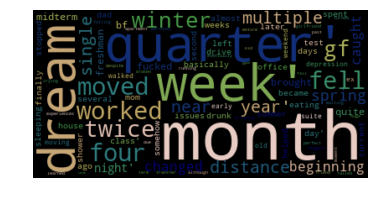

In [472]:
cmaps = cycle([
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'hsv',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'])
for i in range(4):
    col = next(cmaps);
    display_cloud(i, col)

In [473]:
from nltk.corpus import subjectivity
nltk.download('vader_lexicon')
# first, we import the relevant modules from the NLTK library
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# next, we initialize VADER so we can use it within our Python script
sid = SentimentIntensityAnalyzer()

# the variable 'message_text' now contains the text we will analyze.
message_text = '''Like you, I am getting very frustrated with this process. I am genuinely trying to be as reasonable as possible. I am not trying to "hold up" the deal at the last minute. I'm afraid that I am being asked to take a fairly large leap of faith after this company (I don't mean the two of you -- I mean Enron) has screwed me and the people who work for me.'''

print(message_text)

# Calling the polarity_scores method on sid and passing in the message_text outputs a dictionary with negative, neutral, positive, and compound scores for the input text
scores = sid.polarity_scores(message_text)

# Here we loop through the keys contained in scores (pos, neu, neg, and compound scores) and print the key-value pairs on the screen

for key in sorted(scores):
        print('{0}: {1}, '.format(key, scores[key]), end='')

Like you, I am getting very frustrated with this process. I am genuinely trying to be as reasonable as possible. I am not trying to "hold up" the deal at the last minute. I'm afraid that I am being asked to take a fairly large leap of faith after this company (I don't mean the two of you -- I mean Enron) has screwed me and the people who work for me.
compound: -0.3804, neg: 0.093, neu: 0.836, pos: 0.071, 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/tyler/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [474]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# next, we initialize VADER so we can use it within our Python script
sid = SentimentIntensityAnalyzer()

all_nltk_vader_scores = defaultdict(int)
clean_content = clean_comments[0].tolist()
for i,note in tqdm(enumerate(clean_content)):
    scores = sid.polarity_scores(note)
    all_nltk_vader_scores[i] = np.array([scores['neg'],scores['neu'],scores['pos'],scores['compound']])
    

8214it [00:06, 1351.44it/s]


In [476]:
nltk_vader = pd.DataFrame.from_dict(all_nltk_vader_scores, orient='index', columns=['neg','neu','pos','compound'])

In [477]:
nltk_vader.head()

,neg,neu,pos,compound
0,0.107,0.597,0.295,0.9397
1,0.103,0.754,0.143,0.8731
2,0.000,0.757,0.243,0.7269
3,0.000,0.950,0.050,0.0258
4,0.000,0.759,0.241,0.9072


In [478]:
df = pd.concat([new,nltk_vader],axis=1)

In [479]:
df['hour']=confessions.timestamp.dt.strftime('%H')

In [480]:
df.head()

,id,timestamp,content,contact,tags,note,weekday,Valence,Arousal,Dominance,neg,neu,pos,compound,hour
0,14442,2019-10-12 17:05:24,I’m super excited for homecoming next weekend ...,NaN,NaN,NaN,Sat,12.933,16.362,7.857,0.107,0.597,0.295,0.9397,17
1,14441,2019-10-12 13:22:03,"If I never met you, I would never have gotten ...",NaN,serious,NaN,Sat,28.600,34.980,15.510,0.103,0.754,0.143,0.8731,13
2,14440,2019-10-11 17:03:50,There is an abnormal amount of hot girls that ...,NaN,NaN,NaN,Fri,4.270,4.900,4.370,0.000,0.757,0.243,0.7269,17
3,14439,2019-10-11 15:58:00,"Just out of curiosity, on a scale of one to te...",NaN,NaN,NaN,Fri,3.080,3.256,2.304,0.000,0.950,0.050,0.0258,15
4,14438,2019-10-10 19:10:20,To the person who was playing the trumpet outs...,NaN,wholesome,NaN,Thu,5.610,3.036,5.335,0.000,0.759,0.241,0.9072,19


In [481]:
hour_neg_sum=df.groupby('hour')['neg'].sum()
hour_neg_count=df.groupby('hour')['neg'].count()
neg = hour_neg_sum/hour_neg_count

hour_pos_sum=df.groupby('hour')['pos'].sum()
hour_pos_count=df.groupby('hour')['pos'].count()
pos = hour_pos_sum/hour_pos_count

hour_neu_sum=df.groupby('hour')['neu'].sum()
hour_neu_count=df.groupby('hour')['neu'].count()
neu = hour_neu_sum/hour_neu_count

hour_compound_sum=df.groupby('hour')['compound'].sum()
hour_compound_count=df.groupby('hour')['compound'].count()
compound = hour_compound_sum/hour_compound_count




In [482]:
neg

hour
00    0.092220
01    0.091913
02    0.087719
03    0.087371
04    0.111836
05    0.081987
06    0.067105
07    0.094835
08    0.081828
09    0.090624
10    0.091769
11    0.090871
12    0.084033
13    0.095806
14    0.094071
15    0.091138
16    0.099051
17    0.088221
18    0.087063
19    0.094345
20    0.089399
21    0.097357
22    0.088756
23    0.093243
Name: neg, dtype: float64

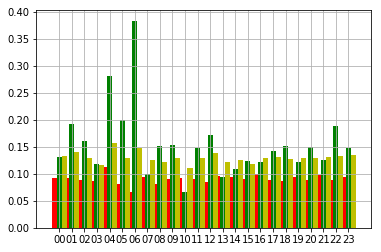

In [483]:
fig, ax = plt.subplots()
index = np.arange(24)
bar_width =0.5
w = 0.4
ax.bar(index-w, neg.values, width=w, color='r', align='center')
# ax.bar(index-(w/2), neu.values, width=w, color='y', align='center')
ax.bar(index, compound.values, width=w, color='g', align='center')
ax.bar(index+w, pos.values, width=w, color='y', align='center')

# ax.bar(list(weekday_distri.index))

ax.grid()
plt.xticks(index,list(compound.index))
fig.savefig("weekday_nltk_vader.png")
plt.show()

In [365]:
nltk.download('subjectivity')

[nltk_data] Downloading package subjectivity to
[nltk_data]     /Users/tyler/nltk_data...
[nltk_data]   Unzipping corpora/subjectivity.zip.


True

In [368]:
def get_word_table(table, key, sim_key='similarity', show_sim = True):
    if show_sim == True:
        return pd.DataFrame(table, columns=[key, sim_key])
    else:
        return pd.DataFrame(table, columns=[key, sim_key])[key]

In [414]:
keys = ['sad','serious','stressed','relationship','school' ];
tables = [];
for key in keys:
    tables.append(get_word_table(model.wv.similar_by_word(key), key, show_sim=False))

In [415]:
pd.concat(tables, axis=1)


,sad,serious,stressed,relationship,school
0,feeling,fwb,missing,fall,high
1,scared,lowkey,rejected,recently,classes
2,insecure,'anyways,horny,fwb,last
3,worried,missing,falling,finally,year
4,sometimes,'any,struggling,dream,working
5,bad,interest,busy,boyfriend,quarter
6,kinda,suicide,drunk,anxiety,years
7,depressed,emotionally,potential,sex,old
8,afraid,potential,broken,girlfriend,middle
9,happy,partner,graduating,crush,weeks


In [ ]:
### DO subjectivity analysis
###fix pos/negative filter, retrain word2vec models, produce

In [418]:
from nltk.corpus import subjectivity

In [429]:
n_instances = 5
subj_docs = [(sent, 'subj') for sent in subjectivity.sents(categories='subj')[:n_instances]]
obj_docs = [(sent, 'obj') for sent in subjectivity.sents(categories='obj')[:n_instances]]
len(subj_docs), len(obj_docs)

(5, 5)